In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns


itemCategories= pd.read_csv("../data/item_categories.csv")

itemCategories

items=pd.read_csv("../data/items.csv")

items


sales_train=pd.read_csv("../data/sales_train.csv")

sales_train

sample_submission=pd.read_csv("../data/sample_submission.csv") 
sample_submission

shops= pd.read_csv("../data/shops.csv")
shops

test=pd.read_csv("../data/test.csv")
test



,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None


In [80]:
#Changing from object to date format
sales_train['date_string']=sales_train['date'].astype('str')

sales_train.date=sales_train.date_string.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))


In [82]:
print(sales_train.info())
sales_train


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
date_string       object
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 156.8+ MB
None


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_string
0,2013-01-02,0,59,22154,999.00,1.0,02.01.2013
1,2013-01-03,0,25,2552,899.00,1.0,03.01.2013
2,2013-01-05,0,25,2552,899.00,-1.0,05.01.2013
3,2013-01-06,0,25,2554,1709.05,1.0,06.01.2013
4,2013-01-15,0,25,2555,1099.00,1.0,15.01.2013
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,10.10.2015
2935845,2015-10-09,33,25,7460,299.00,1.0,09.10.2015
2935846,2015-10-14,33,25,7459,349.00,1.0,14.10.2015
2935847,2015-10-22,33,25,7440,299.00,1.0,22.10.2015


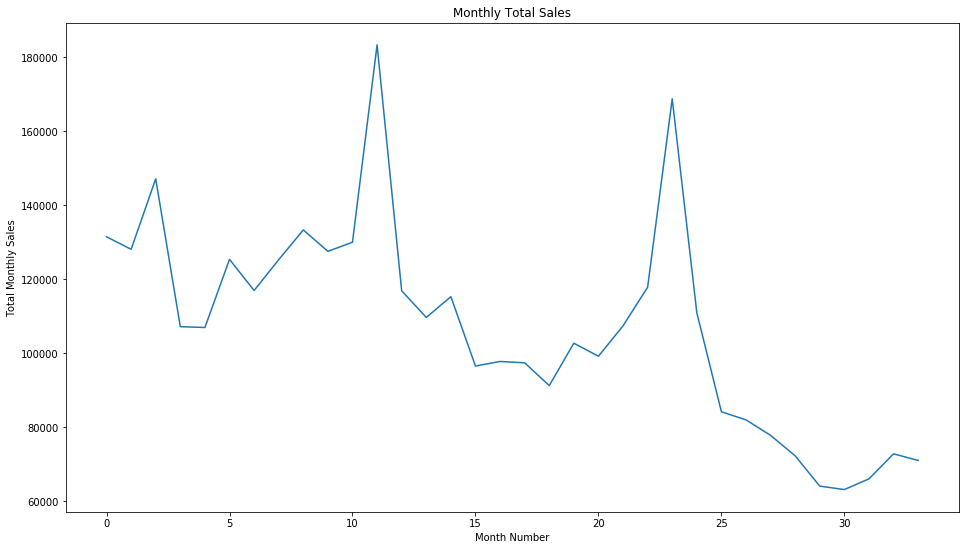

In [64]:
#date_block_num is consecutive month number
#time series for monthly sales

totalSales_ts= sales_train.groupby(["date_block_num"])["item_cnt_day"].sum()
plt.figure(figsize=(16,9))
plt.title('Monthly Total Sales')
plt.xlabel("Month Number")
plt.ylabel("Total Monthly Sales")
plt.plot(totalSales_ts)




In [ ]:
import statsmodels.api as sm
#Assuming our ts model to be multiplicatice 
#Check whether multiplicative or additive by checking if acf is smaller for additive model or multiplicativ